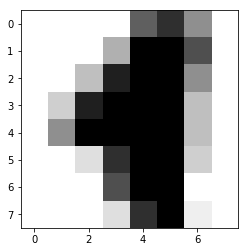

In [108]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional
from torch.utils.data import TensorDataset, DataLoader, random_split
%matplotlib inline

X, y = ds.load_digits(n_class=2, return_X_y=True)
plt.imshow(X[50].reshape((8, 8)), cmap='binary')
l = len(X)


In [109]:
X = torch.LongTensor(X)
y = torch.LongTensor(y)
data = TensorDataset(X, y)
train_data, test_data, val_data = random_split(data, [int(l * 0.7), int(l * 0.2), l - int(l * 0.7) - int(l * 0.2)])


In [114]:
class Lin(torch.nn.Module):
    def __init__(self, input):
        super(Lin, self).__init__()
        self.linear = nn.Linear(input, 2)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out


input = 8 * 8
#output = 2
model = Lin(input)


In [167]:
def Validate(model, val_data):
    val_loader = DataLoader(dataset=val_data, batch_size=10, shuffle=True)
    model = model.eval()
    correct = 0
    total = 0
    for X_batch, y_batch in val_loader:
        y_pred = model(X_batch.float())
        total += y_batch.size(0)
        correct += (y_pred.argmax(1) == y_batch).sum().item()
    return correct / total


In [169]:
def train_model(model, train_data, val_data, max_epochs=100):
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
    loss = nn.CrossEntropyLoss()
    train_loader = DataLoader(dataset=train_data, batch_size=20, shuffle=True)
    for epoch in range(max_epochs):
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            model = model.train()
            y_pred = model(X_batch.float())
            loss1 = loss(y_pred, y_batch)
            total += y_batch.size(0)
            correct += (y_pred.argmax(1) == y_batch).sum().item()
            loss1.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch % 3 == 2:
            acc = correct / total
            print(f'Epoch = {epoch}, acc = {acc}, loss = {loss1}')
            print(f'VAL:  Epoch = {epoch},acc ={Validate(model,val_data)} ')
train_model(model, train_data, val_data)


Epoch = 2, acc = 1.0, loss = 0.3133995234966278
VAL:  Epoch = 2,acc =1.0 
Epoch = 5, acc = 1.0, loss = 0.31327417492866516
VAL:  Epoch = 5,acc =1.0 
Epoch = 8, acc = 1.0, loss = 0.31330132484436035
VAL:  Epoch = 8,acc =1.0 
Epoch = 11, acc = 1.0, loss = 0.31335604190826416
VAL:  Epoch = 11,acc =1.0 
Epoch = 14, acc = 1.0, loss = 0.31329789757728577
VAL:  Epoch = 14,acc =1.0 
Epoch = 17, acc = 1.0, loss = 0.3132680654525757
VAL:  Epoch = 17,acc =1.0 
Epoch = 20, acc = 1.0, loss = 0.3132648766040802
VAL:  Epoch = 20,acc =1.0 


Epoch = 23, acc = 1.0, loss = 0.3132656514644623
VAL:  Epoch = 23,acc =1.0 
Epoch = 26, acc = 1.0, loss = 0.31327563524246216
VAL:  Epoch = 26,acc =1.0 
Epoch = 29, acc = 1.0, loss = 0.31343552470207214
VAL:  Epoch = 29,acc =1.0 
Epoch = 32, acc = 1.0, loss = 0.31326889991760254
VAL:  Epoch = 32,acc =1.0 
Epoch = 35, acc = 1.0, loss = 0.3132665753364563
VAL:  Epoch = 35,acc =1.0 


Epoch = 38, acc = 1.0, loss = 0.31326717138290405
VAL:  Epoch = 38,acc =1.0 
Epoch = 41, acc = 1.0, loss = 0.31329023838043213
VAL:  Epoch = 41,acc =1.0 
Epoch = 44, acc = 1.0, loss = 0.31327322125434875
VAL:  Epoch = 44,acc =1.0 
Epoch = 47, acc = 1.0, loss = 0.3132726550102234
VAL:  Epoch = 47,acc =1.0 
Epoch = 50, acc = 1.0, loss = 0.3132655918598175
VAL:  Epoch = 50,acc =1.0 


Epoch = 53, acc = 1.0, loss = 0.313280314207077
VAL:  Epoch = 53,acc =1.0 
Epoch = 56, acc = 1.0, loss = 0.31329554319381714
VAL:  Epoch = 56,acc =1.0 
Epoch = 59, acc = 1.0, loss = 0.31327617168426514
VAL:  Epoch = 59,acc =1.0 
Epoch = 62, acc = 1.0, loss = 0.3132759630680084
VAL:  Epoch = 62,acc =1.0 
Epoch = 65, acc = 1.0, loss = 0.3132672607898712
VAL:  Epoch = 65,acc =1.0 
Epoch = 68, acc = 1.0, loss = 0.3132699728012085


VAL:  Epoch = 68,acc =1.0 
Epoch = 71, acc = 1.0, loss = 0.31335198879241943
VAL:  Epoch = 71,acc =1.0 
Epoch = 74, acc = 1.0, loss = 0.31326958537101746
VAL:  Epoch = 74,acc =1.0 
Epoch = 77, acc = 1.0, loss = 0.3133503198623657
VAL:  Epoch = 77,acc =1.0 
Epoch = 80, acc = 1.0, loss = 0.31326788663864136
VAL:  Epoch = 80,acc =1.0 
Epoch = 83, acc = 1.0, loss = 0.31326916813850403
VAL:  Epoch = 83,acc =1.0 


Epoch = 86, acc = 1.0, loss = 0.31328845024108887
VAL:  Epoch = 86,acc =1.0 
Epoch = 89, acc = 1.0, loss = 0.3133159577846527
VAL:  Epoch = 89,acc =1.0 
Epoch = 92, acc = 1.0, loss = 0.31336167454719543
VAL:  Epoch = 92,acc =1.0 
Epoch = 95, acc = 1.0, loss = 0.3132869005203247
VAL:  Epoch = 95,acc =1.0 
Epoch = 98, acc = 1.0, loss = 0.3133905231952667
VAL:  Epoch = 98,acc =1.0 
